## Case Study – Acme Distributors

In [472]:
import pandas as pd

#Loading Monthly Sales Data.
buyer_jantooct2012 = pd.read_csv("C:/Users/dreddyag/OneDrive - STOUT/Desktop/Case Interview - Take Home Version/Take Home Version/Original Data Received/MonthlyBuyerCrosswalk_JanToOct2012.csv")
buyer_jantooct2012['Buyer'] = buyer_jantooct2012['Buyer'].astype(str)
buyer_jantooct2012['Date'] = pd.to_datetime(buyer_jantooct2012['Date'])

#Find the Empty Transactions in Monthly Sales Data.
buyer_null=buyer_jantooct2012.loc[buyer_jantooct2012['Monthly_Buyer_ID'].isnull(), ['Buyer', 'Date']]
month = set(buyer_null['Date'])
print(f" The Company that had empty Transactions, {set(buyer_null['Buyer'])} for Month of {month}")

 The Company that had empty Transactions, {'Company STU'} for Month of {Timestamp('2012-08-01 00:00:00')}


### From the Above Analysis , we can see that Monthly_Buyer_ID is present for all Buyers except Company STU which are all empty . We can say that Company STU did most of the Transactions on August 2012 , which may indicate false invoicing . We can further investigate this buyer for Month of October.

In [476]:
#Now lets find Min and Max length of Product Numbers.
sales_jantooct2012['Product_Num_length'] = sales_jantooct2012['Product_Number'].astype(str).str.len()
min_length = sales_jantooct2012['Product_Num_length'].min()
max_length = sales_jantooct2012['Product_Num_length'].max()
print(f" The Product Numbers can have minimum of {min_length} and Maximum of {max_length} lengths.")

 The Product Numbers can have minimum of 1 and Maximum of 3 lengths.


In [ ]:
#Lets get the First number in Product Number map it to actual product using material_jantooct2012 dataframe
sales_jantooct2012['Product_Number_Prefix'] = sales_jantooct2012["Product_Number"].astype(str).str[0]
sales_jantooct2012['Product_Number_Prefix'] = sales_jantooct2012['Product_Number_Prefix'].astype(int)

### Explorary Data Analysis

### 1. Total Transactions for Company STU in the Month of August

In [477]:
total_buyside_stu=len(buyer_jantooct2012.loc[(buyer_jantooct2012['Buyer']=="Company STU") & (buyer_jantooct2012['Date']=="2012-08-01")])
print(f"Total of {total_buyside_stu} transactions occured for Company STU in month of August")

Total of 73 transactions occured for Company STU in month of August


### 2. Month-wise Transaction Details of Buyer

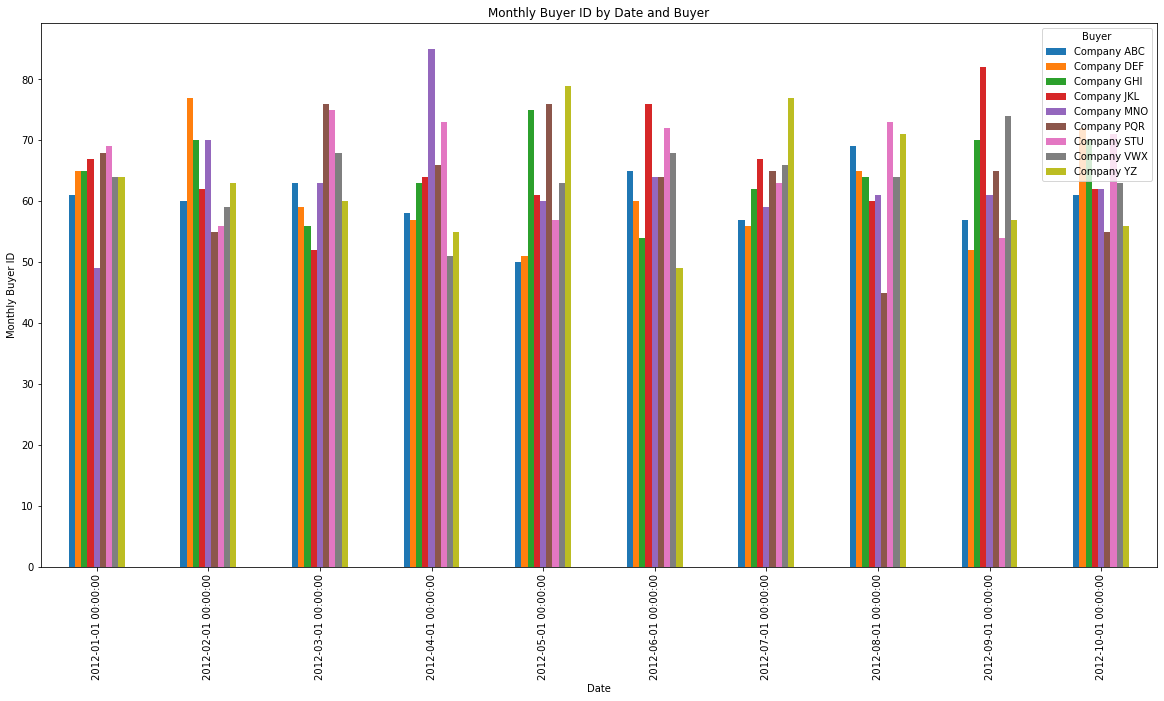

Based on the Above Analysis we can't find any hike in Transactions for Company STU Monthly. No of Trnsactaions may not be very good metric to Understand Kickbacks.


In [487]:
monthly_buyer_count = buyer_jantooct2012.groupby(['Buyer', 'Date'])['Monthly_Buyer_ID'].count().reset_index()
monthly_buyer_count

# Pivot the monthly_buyer_count dataframe
pivoted_df = pd.pivot_table(monthly_buyer_count, values='Monthly_Buyer_ID', index='Date', columns='Buyer')
pivoted_df.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Date')
plt.ylabel('Monthly Buyer ID')
plt.title('Monthly Buyer ID by Date and Buyer')
plt.show()

print("Based on the Above Analysis we can't find any hike in Transactions for Company STU Monthly. No of Trnsactaions may not be very good metric to Understand Kickbacks.")

### 3.  Did the Monthly and Daily Transactions Match based on Buyer_Ids

In [488]:
buyer_jantooct2012['Monthly_Buyer_ID'].fillna(0, inplace=True)
buyer_jantooct2012['Monthly_Buyer_ID'] = buyer_jantooct2012['Monthly_Buyer_ID'].astype(int)

buyers_total_transactions=buyer_jantooct2012.groupby(['Monthly_Buyer_ID'])[['Buyer']].count().reset_index()
print(f"Total Transactions found from Monthly datasets :{len(buyers_total_transactions)}\n")

sales_total_transactions=sales_jantooct2012.groupby(['Buyer_ID'])['Transaction ID'].count().reset_index()
print(f"Total Transactions found from Daily datasets :{len(sales_total_transactions)}\n")

print("<<There are lot of missing transactions between Monthly and Daily Transaction details>>\n")
result = [i for i in buyers_total_transactions['Monthly_Buyer_ID'] if i not in sales_total_transactions['Buyer_ID']]

# sales_total_transactions['Buyer_ID'].to_csv("456.csv")
result = list(set(buyers_total_transactions['Monthly_Buyer_ID']) - set(sales_total_transactions['Buyer_ID']))
print(f"These are the Transactions are missing in SalesData_JanToOct2012.csv file from MonthlyBuyer.csv file:{result} based on Monthly_Buyer_ID and Buyer_ID fields")

Total Transactions found from Monthly datasets :573

Total Transactions found from Daily datasets :553

<<There are lot of missing transactions between Monthly and Daily Transaction details>>

These are the Transactions are missing in SalesData_JanToOct2012.csv file from MonthlyBuyer.csv file:[0, 1, 256, 513, 135, 404, 410, 422, 47, 564, 310, 439, 183, 188, 66, 483, 494, 111, 506, 124] based on Monthly_Buyer_ID and Buyer_ID fields


### 4. Total Transaction Details for Every Buyer, Month-Wise

In [493]:
highlighted_df = pivoted_df.style.highlight_max(axis=1, color='orange')
print("Here 73 denotes the total empty transactions for Company STU . We can find the Sudden decrease in Transactions for Company STU only in the month of August which may be a kickback transaction.")
highlighted_df

Here 73 denotes the total empty transactions for Company STU . We can find the Sudden decrease in Transactions for Company STU only in the month of August which may be a kickback transaction.


Buyer,Company ABC,Company DEF,Company GHI,Company JKL,Company MNO,Company PQR,Company STU,Company VWX,Company YZ
Date,,,,,,,,,
2012-01-01 00:00:00,61,65,65,67,49,68,69,64,64
2012-02-01 00:00:00,60,77,70,62,70,55,56,59,63
2012-03-01 00:00:00,63,59,56,52,63,76,75,68,60
2012-04-01 00:00:00,58,57,63,64,85,66,73,51,55
2012-05-01 00:00:00,50,51,75,61,60,76,57,63,79
2012-06-01 00:00:00,65,60,54,76,64,64,72,68,49
2012-07-01 00:00:00,57,56,62,67,59,65,63,66,77
2012-08-01 00:00:00,69,65,64,60,61,45,73,64,71
2012-09-01 00:00:00,57,52,70,82,61,65,54,74,57


In [494]:
#Check how many records are there for Month of October in Orginal and New one

sales_org['Date'] = pd.to_datetime(sales_org['Date'])
sales_org['Month'] = sales_org['Date'].dt.strftime('%Y-%m')
total_oct_data=len(sales_org[sales_org['Month']=="2012-10"])
print(f' There are total of {total_oct_data} October data in Original Dataset.')
print(f' There are total of {len(sales_new)} October data in New Dataset.')

 There are total of 121 October data in Original Dataset.
 There are total of 198 October data in New Dataset.


### From the above analysis we can see that new dataset has more records than existing sheet given.

## Data Preprocessing : Price and Date

In [360]:
from datetime import datetime

def preprocess_date(row):
        
    if not "-" in str(row["Date"]):
        
        return sales_org[sales_org["Transaction ID"]==row["Transaction_ID"]]["Date"]
    
    return row["Date"]

def preprocess_price(row):  
    if  np.isnan(row["Price"]):
        return row["Unnamed: 6"]
    
    return row["Price"]
    
sales_new["Price"] = sales_new.apply(preprocess_price, axis=1)
sales_new["Date"] = sales_new.apply(preprocess_date, axis=1)

### 6) This is the Program to verify how many new Transactions where added in the New October dataset and also verify reduntact and Corrupted Transactions.

In [413]:
new_transactions = 0
courrupted_transactions = 0
old_transactions = 0
new_rows=[]

for row_index in range(0,sales_new.shape[0]):
    
    try:
        prev_row = sales_org[sales_org["Transaction ID"]==sales_new["Transaction_ID"][row_index]]
    
        if sales_new[["Buyer_ID","Product_Number", "Units", "Price"]].iloc[row_index].equals(prev_row[["Buyer_ID", "Product_Number", "Units", "Price"]].iloc[0]):
            old_transactions += 1 
            continue
        else:
            courrupted_transactions += 1
            print("A transaction is changed in the new file: ",  sales_new.iloc[row_index])
    
    except IndexError:
        
        new_rows.append(row_index)
        new_transactions += 1

In [420]:
sales_new=sales_new.drop('Unnamed: 6', axis=1)
sales_new=sales_new.drop('price', axis=1)

In [422]:
print (f"There are total of {new_transactions} new Transactions in October.")
print (f"There are total of {old_transactions} old  Transactions in October.")
print (f"There are total of {courrupted_transactions} Corrupted Transactions whose data changed.")

preprocessed_new_data =  sales_new.iloc[new_rows]

There are total of 77 new Transactions in October.
There are total of 121 old  Transactions in October.
There are total of 0 Corrupted Transactions whose data changed.


### Observation : The new data for October has incorrect values in Date and null values in Price . For fixing the Date i mapped it to the existing October sales data and fixed the date. For Price I bought it from the Extra Column when Price was empty . Apart from this , I also checked how many newly occuring transactions are there in the New October dataset. I also checked if there are any corrupted transactions from old and new datasets. Finally , 77 new Transactions where found for October and imported to Snowflake.

In [495]:
preprocessed_new_data

,Transaction_ID,Buyer_ID,Date,Product_Number,Units,Price
121,168807764,375,2012-10-17 00:00:00,608,118,31.53
122,905656767,431,2012-10-17 00:00:00,148,927,35.71
123,486173084,492,2012-10-17 00:00:00,322,669,23.22
124,578371770,500,2012-10-17 00:00:00,62,43,22.63
125,558553711,567,2012-10-17 00:00:00,247,398,25.33
...,...,...,...,...,...,...
193,242028604,309,2012-10-28 00:00:00,322,441,29.97
194,735806694,317,2012-10-28 00:00:00,733,293,42.55
195,961843577,356,2012-10-28 00:00:00,794,517,44.92
196,537974712,432,2012-10-28 00:00:00,411,866,41.11


### These are the new Transactions found for the month of October , which needs to be inserted into database.

## Data Analysis - Before Importing the new October dataset into DB.

In [346]:
sales_org = pd.read_csv("C:/Users/dreddyag/OneDrive - STOUT/Desktop/Case Interview - Take Home Version/Take Home Version/Original Data Received/SalesData_JanToOct2012.csv")

sales_new = pd.read_excel("C:/Users/dreddyag/OneDrive - STOUT/Desktop/Case Interview - Take Home Version/Take Home Version/Updated Data Received/SalesData_Oct2012.xlsx")

In [462]:
#csvs' are exported from Snowflake sql query results. (3,4,5 questions)
three_before_import=pd.read_csv("3_beforeimport.csv")
four_before_import=pd.read_csv("4_beforeimport.csv")
five_before_import=pd.read_csv("5_beforeimport.csv")
five_before_import_allprocuts=pd.read_csv("5_beforeimport_allproducts.csv")

### 1)	What information or data would be useful to investigate the issue?
Acme Corporation's kickback investigation requires the gathering of several key pieces of information, including financial records such as invoices, receipts, purchase orders, and bank statements, which provide a detailed account of the company's transactions with its customers. 

Customer records are needed to identify the recipients of kickbacks, including their contact information and transaction history with Acme. Employee records are also necessary to determine the involvement of Acme's employees in the kickback scheme, including their job titles and responsibilities. Communication records, like emails and phone records, must be examined to identify any potential correspondence between Acme's employees and the customers' executives regarding the kickback scheme. 

Grant records are required to understand the Federal grants and monies used by the customers to purchase materials from Acme, including the grant amounts and terms. Knowledge of the regulations governing the pharmaceutical and biotech industry is necessary, including the rules surrounding the use of Federal grants and monies.


### 2)	Review the data (see folder “Original Data Received”) and data dictionary (see page 2). What are some initial steps you would take before and after you import the client’s raw flat files into SQL/Snowflake?

Before Imports these Steps where followed.
I would pre-process the data, check for nan values and check for duplicate records and data-types should be fixed. We also rename the columns same as the schema columns. In our case there is a Primary key-Foreign Key relationship between sales_daily_data and MATERIAL based on product_mat_prefix , so we need to calculate this column before importing. Additionally , every database table has a primary key as integer for faster retreivals.

Database Schema Design.
I created Fact table and Dimension tables , based on Star Schema . The Fact Tables are sales_daily_data,monthly_buyer_data and the dimension table is material which has only unique records.

After Imports:
In order to solve the queries I have created a new "Month" column by extracting it from "Date" column. After running the queries , I have exported them into csv and analyzed them further in Python. (Which are shown in below sections in this notebook 3,4,5)

### 3)	Counsel asks for a summary of sales revenue by month. This will enable them to cross-reference the sales data with deposits to the corporate accounts to identify potential kickbacks over time.  Write the SQL code to calculate this.

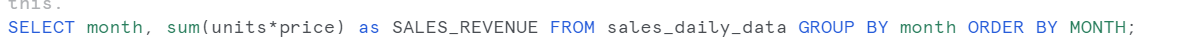


### Query Result

In [498]:
three_before_import 

,MONTH,SALES_REVENUE
0,2012-01,3102646.76
1,2012-02,3035337.87
2,2012-03,2586518.11
3,2012-04,3180129.28
4,2012-05,3022949.16
5,2012-06,2970547.08
6,2012-07,2842145.91
7,2012-08,2631915.58
8,2012-09,2740857.21
9,2012-10,1832490.49


### Total Revevue for Each Month

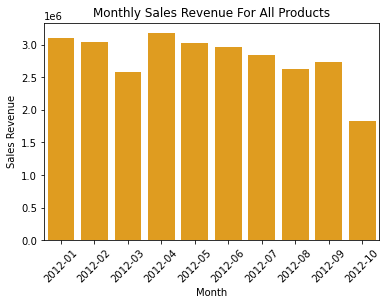

<Figure size 2160x2160 with 0 Axes>

In [457]:
# create bar plot using seaborn
sns.barplot(data=three_before_import, x='MONTH', y='SALES_REVENUE', color='orange')

# set plot title and axis labels
plt.title('Monthly Sales Revenue For All Products')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')

# rotate x-axis labels
plt.xticks(rotation=45)

# increase figure size
plt.figure(figsize=(30, 30))

# display plot
plt.show()

### Observation: There is decrease in Revenue for the Month of October.

## 4)	While conducting our investigation Counsel determines that kickbacks are occurring only in the sales team associated with plastics. They have asked for an updated summary of sales by month but for only the plastic categories of materials.  Write the SQL code to calculate this. If possible, write this code using a join.

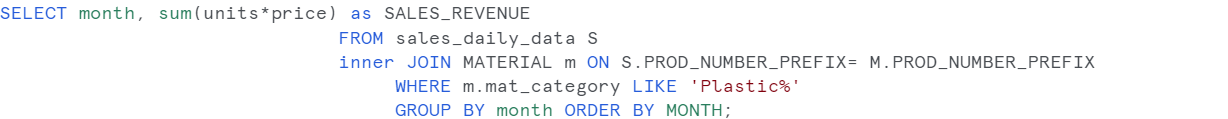

### Query Result

In [427]:
four_before_import

,MONTH,SALES_REVENUE
0,2012-01,873544.90
1,2012-02,809802.12
2,2012-03,827388.90
3,2012-04,922470.22
4,2012-05,958249.49
5,2012-06,911331.92
6,2012-07,855067.06
7,2012-08,792457.33
8,2012-09,752519.19
9,2012-10,573032.45


### Plastic Revenue For Each Month

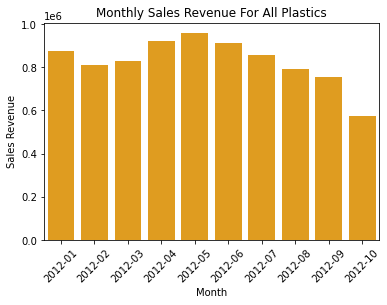

<Figure size 2160x2160 with 0 Axes>

In [459]:
# create bar plot using seaborn
sns.barplot(data=four_before_import, x='MONTH', y='SALES_REVENUE', color='orange')

# set plot title and axis labels
plt.title('Monthly Sales Revenue For All Plastics')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')

# rotate x-axis labels
plt.xticks(rotation=45)

# increase figure size
plt.figure(figsize=(30, 30))

# display plot
plt.show()

### Observation : Plastic Revenue has also been decreased in the Month of October.

In [460]:
sales_allproducts=three_before_import['SALES_REVENUE']
sales_onlyplastics=four_before_import['SALES_REVENUE']
sale_month=three_before_import['MONTH']
df_stacked_frame= pd.DataFrame()
df_stacked_frame['Sale_All_Products']=sales_allproducts
df_stacked_frame['Sale_Plastics']=sales_onlyplastics
df_stacked_frame['MONTH']=sale_month
df_stacked_frame

,Sale_All_Products,Sale_Plastics,MONTH
0,3102646.76,873544.90,2012-01
1,3035337.87,809802.12,2012-02
2,2586518.11,827388.90,2012-03
3,3180129.28,922470.22,2012-04
4,3022949.16,958249.49,2012-05
5,2970547.08,911331.92,2012-06
6,2842145.91,855067.06,2012-07
7,2631915.58,792457.33,2012-08
8,2740857.21,752519.19,2012-09
9,1832490.49,573032.45,2012-10


## Comparing total revenue with plastic revenue for each month 

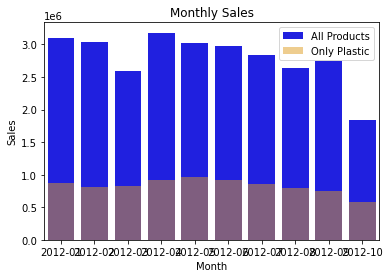

In [461]:
# create stacked bar plot using seaborn
sns.barplot(data=df_stacked_frame, x='MONTH', y='Sale_All_Products', color='blue', label='All Products')
sns.barplot(data=df_stacked_frame, x='MONTH', y='Sale_Plastics', color='orange', label='Only Plastic', alpha=0.5)

# set plot title and axis labels
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')

# add legend
plt.legend()

# display plot
plt.show()

### Observation : The Above Shows the Total Revenue Compared to Plastic Revenue For Each Month. Plastic Revenue has been constant troughout the year, while the total Revenue has been decreased for October.

## 5)	Upon looking at your analysis of sales for the plastics category, Counsel further identifies that not all customers are allegedly providing kickbacks but rather only a subset of the customers. Counsel has asked for a summary of sales revenue by month and for each customer in the plastics categories.  Write the SQL code to calculate this.

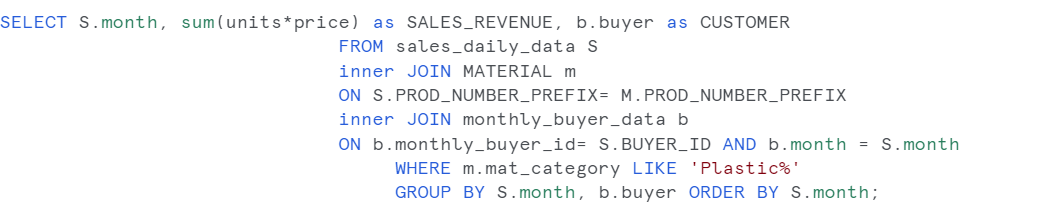

### Query Result

In [428]:
five_before_import

,MONTH,SALES_REVENUE,CUSTOMER
0,2012-01,98025.76,Company JKL
1,2012-01,129225.65,Company VWX
2,2012-01,51389.73,Company YZ
3,2012-01,151259.83,Company STU
4,2012-01,124519.89,Company DEF
...,...,...,...
84,2012-10,41235.48,Company GHI
85,2012-10,53851.45,Company ABC
86,2012-10,144924.09,Company JKL
87,2012-10,48572.25,Company YZ


## Analysis of Monthly revenue of plastics for each customer

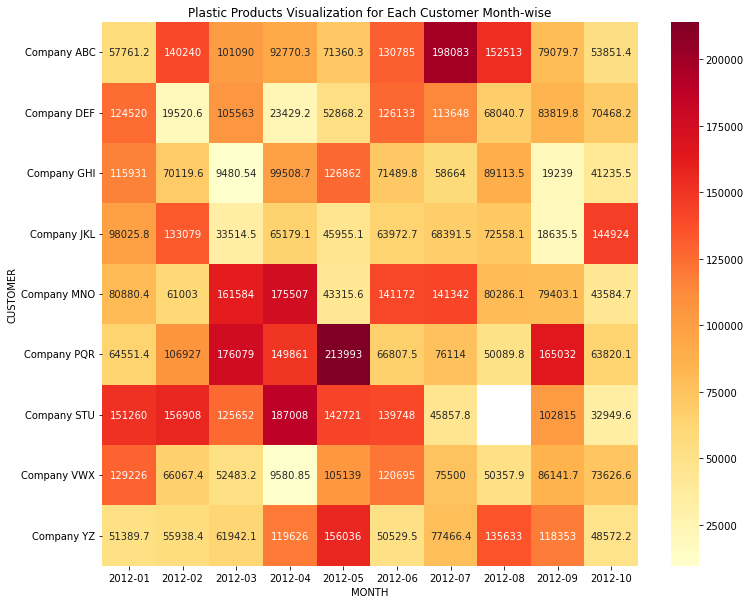

In [464]:
#Heap Map 
import seaborn as sns

# create pivot table
pivot_df = five_before_import.pivot_table(values='SALES_REVENUE', index='CUSTOMER', columns='MONTH', aggfunc='sum')

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pivot_df, cmap='YlOrRd', annot=True, fmt='g', ax=ax)

ax.set_title('Plastic Products Visualization for Each Customer Month-wise')
# display plot
plt.show()

### Observation : Company STU who has a constant revenue throughout the year , but we can see a sudden 0 transactions in the Month of August. This Looks like a Kickback Transaction.

## Analysis of Monthly revenue from all products for each customer

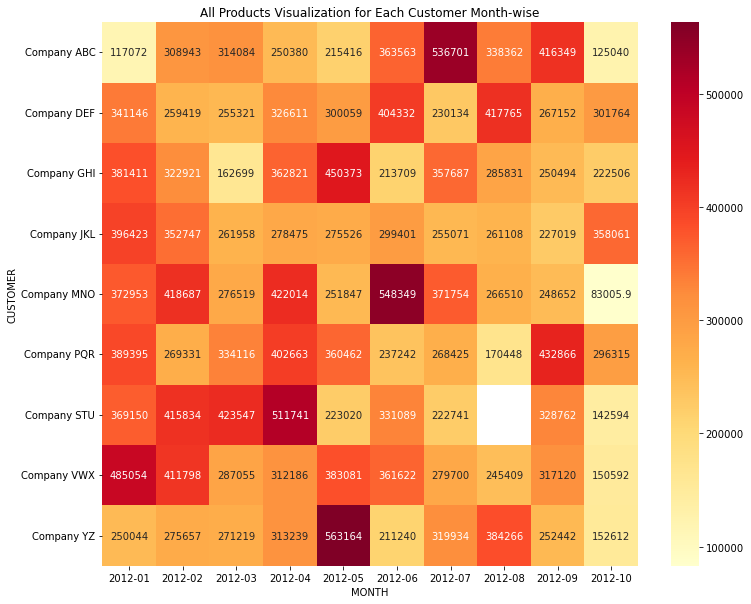

In [465]:
#Heap Map 
import seaborn as sns

# create pivot table
pivot_df = five_before_import_allprocuts.pivot_table(values='SALES_REVENUE', index='CUSTOMER', columns='MONTH', aggfunc='sum')

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pivot_df, cmap='YlOrRd', annot=True, fmt='g', ax=ax)

ax.set_title('All Products Visualization for Each Customer Month-wise')
# display plot
plt.show()

### Observation: Even for all the products, Company STU who has a constant revenue throughout the year , but we can see a sudden 0 transactions in the Month of August has been found.

### 6. Has been solved above.